In [11]:
from sklearn import svm
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import root_mean_squared_error


In [10]:
df = pd.read_csv('data/salaries_norm.csv')
df.head()

,work_year,salary_in_usd,remote_ratio,experience_level_nomr,company_size_nomr,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Architect,...,company_location_SA,company_location_SE,company_location_SG,company_location_SI,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_location_ZA
0,2024,120.0,0,1,1,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2024,70.0,0,1,1,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2024,130.0,0,1,2,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2024,110.0,0,1,2,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,2024,240.0,0,1,2,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [12]:
df['salary_in_usd'].min()
df['salary_in_usd'].max()

800.0

### 1. Phân chia tập dữ liệu


In [13]:
col = df.columns
def get_XY(df):
    X = df[col].drop(columns = 'salary_in_usd')
    Y = df['salary_in_usd']
    return X, Y

In [14]:
np.random.seed(1)
N = df.shape[0]
percent = 0.7 # tỷ lệ giữa tập text và train                                            
n = round(percent*N)                                               
random_index = np.random.choice(N, size = n, replace = False)   
train_samples = df.index.isin(random_index)
test_samples = ~train_samples 
train = df.iloc[train_samples]
test = df.iloc[test_samples]

In [15]:
x_train,y_train = get_XY(train)
x_test,y_test = get_XY(test)
print(len(x_train),len(x_test))

11546 4948


In [16]:
x_test[:1]

,work_year,remote_ratio,experience_level_nomr,company_size_nomr,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Architect,job_title_AI Developer,...,company_location_SA,company_location_SE,company_location_SG,company_location_SI,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_location_ZA
0,2024,0,1,1,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 2.Huấn luyện và đánh giá mô hình

#### 2.1 Đánh giá mô hình bằng phương pháp RMSE trung bình bình phương sự sai lệch dữ liệu

In [13]:
def evaluate(model,y_test,x_test):
    y_predict = model.predict(x_test)
    acc = np.sqrt(np.mean((y_predict - y_test) ** 2))
    return acc
    

In [42]:
def print_evalu(model,x_test,y_test,x_train,y_train):
    # model.fit(x_train,y_train)
    print(f'Test RMSE: {evaluate(model,y_test,x_test):.3f} ')
    print(f'Train RMSE: {evaluate(model,y_train,x_train):.3f} ') 
    print(f'Train negative mean absolute eror: {np.mean(cross_val_score(model, x_train, y_train, scoring= 'neg_mean_absolute_error', cv=3)):.3f}' )
    print(f'Test negative mean absolute eror: {np.mean(cross_val_score(model, x_test, y_test, scoring= 'neg_mean_absolute_error', cv=3)):.3f}' )
    print(f'Score train model: {model.score(x_train,y_train):.3f}')    
    print(f'Score test model: {model.score(x_train,y_train):.3f}')    

    


#### 2.2 Huấn luyện các mô hình SVR với các kernel khác nhau

In [15]:
svr_linear = svm.SVR(kernel='linear',gamma='scale', epsilon=0.1)
print_evalu(svr_linear,x_test,y_test,x_train,y_train) # đánh giá mô hình svr cơ bản
# svr_linear.predict(x_test[:1])



Test RMSE: 57.129 
Train RMSE: 61.231 
Train negative mean absolute eror: -44.465
Test negative mean absolute eror: -43.777
Score train model: 0.226
Score test model: 0.226


In [16]:
svr_rbf = svm.SVR(kernel="rbf", gamma=0.1)
svr_rbf.fit(x_train,y_train)
print_evalu(svr_rbf,x_test,y_test,x_train,y_train)

Test RMSE: 56.868 
Train RMSE: 61.447 
Train negative mean absolute eror: -43.891
Test negative mean absolute eror: -43.982
Score train model: 0.221
Score test model: 0.221


In [17]:
svm_poly = svm.SVR(kernel='poly', C=10,degree=10)
print_evalu(svm_poly, x_test,y_test,x_train,y_train)


Test RMSE: 66.298 
Train RMSE: 70.117 
Train negative mean absolute eror: -51.463
Test negative mean absolute eror: -50.477
Score train model: -0.014
Score test model: -0.014


#### 2.3 Huấn luyện các mô hình trên với tham số khác nhau

In [18]:
C_par = [0.1,1,10,100,1000]

In [20]:
def bias_variance_decomposition(kernel,x_train,y_train, X_test, y_test,C_par):
    results = []
    for c in C_par:
          if kernel == 'poly':
             model = svm.SVR(kernel=kernel,C= c,degree=7)
          elif kernel == 'rbf':
             model = svm.SVR(kernel=kernel,C= c,gamma = 0.1)
          else: 
             model = svm.SVR(kernel=kernel,C= c)      
          model.fit(x_train,y_train)
          predictions = model.predict(X_test)
          bias = np.mean(y_test) - np.mean(predictions)
          variance = np.sum((predictions - y_test)**2 ) / (len(x_test) - 1)
          results.append((model,c,bias,variance))
    return results

In [21]:
# X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=42)

kernels = ['linear','rbf','poly']
results = []
for kernel in kernels:
    results.append(bias_variance_decomposition(kernel,x_train,y_train,x_test,y_test,C_par))
    


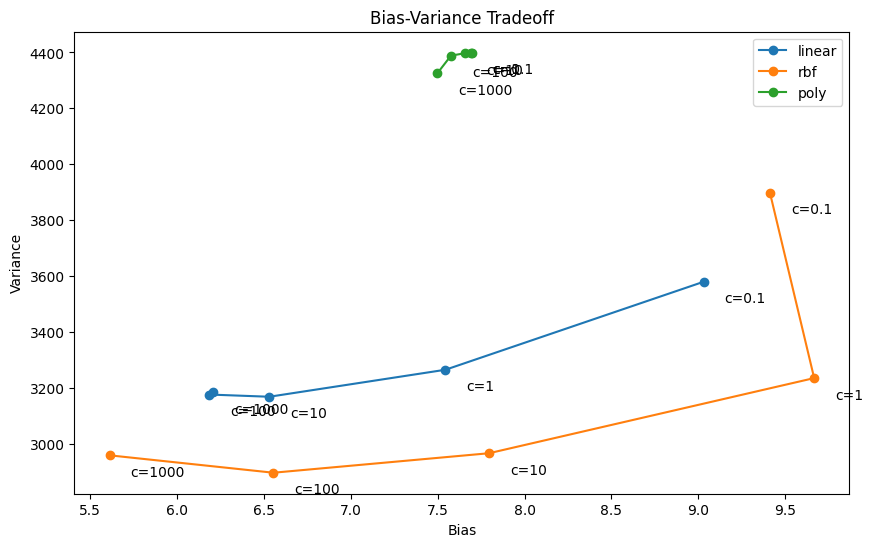

In [22]:
results = np.array(results)
pl = plt.figure(figsize=(10, 6))
for model in results:
    plt.plot(model[:, 2], model[:, 3], 'o-',label = model[:, 0][0].kernel )
    for C in C_par:
        indices = model[:, 1] == C
        subset = model[indices]
        for gamma, bias, variance in zip(subset[:, 1], subset[:, 2], subset[:, 3]):
                plt.annotate(f'c={gamma}', (bias, variance), textcoords="offset points", xytext=(15,-15), ha='left')

pl =plt.xlabel('Bias')
pl = plt.ylabel('Variance')
pl = plt.title('Bias-Variance Tradeoff')
pl =plt.legend()
pl =plt.show()

In [34]:
best_model = results[1][3][0]
print(best_model)

SVR(C=100, gamma=0.1)


In [38]:
print(best_model)
print_evalu(best_model,x_test,y_test,x_train,y_train)


SVR(C=100, gamma=0.1)
Test RMSE: 53.808 
Train RMSE: 57.066 
Train negative mean absolute eror: -41.273
Test negative mean absolute eror: -40.604
Score train model: 0.328
Score test model: 0.328


#### 2.4 Cải tiến mô hình svr_linear bằng các phương pháp ensemble

In [23]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor

In [39]:
bagging_model = BaggingRegressor(estimator=best_model,n_estimators=20)
bagging_model.fit(x_train,y_train)

BaggingRegressor(estimator=SVR(C=100, gamma=0.1), n_estimators=20)

In [40]:
ada_model = AdaBoostRegressor(estimator=best_model, n_estimators=20)
ada_model.fit(x_train,y_train)

AdaBoostRegressor(estimator=SVR(C=100, gamma=0.1), n_estimators=20)

In [43]:
print(bagging_model)
print_evalu(bagging_model,x_test,y_test,x_train,y_train)

BaggingRegressor(estimator=SVR(C=100, gamma=0.1), n_estimators=20)
Test RMSE: 53.597 
Train RMSE: 56.873 
Train negative mean absolute eror: -41.258
Test negative mean absolute eror: -40.518
Score train model: 0.333
Score test model: 0.333


In [44]:
print(ada_model)
print_evalu(ada_model,x_test,y_test,x_train,y_train)

AdaBoostRegressor(estimator=SVR(C=100, gamma=0.1), n_estimators=20)
Test RMSE: 62.030 
Train RMSE: 61.873 
Train negative mean absolute eror: -48.698
Test negative mean absolute eror: -42.599
Score train model: 0.210
Score test model: 0.210
